In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [1]:
#hide
from fastbook import *

### Running Your First Notebook

In [2]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.182618,0.015455,0.005413,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.056592,0.010821,0.003383,00:36


In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

### Sidebar: This Book Was Written in Jupyter Notebooks

In [ ]:
1+1

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [23]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [8]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999990


## Deep Learning Is Not Just for Image Classification

In [3]:
path = untar_data(URLs.CAMVID_TINY)

In [4]:
list(path.glob("images/*"))[:10]

[Path('/root/.fastai/data/camvid_tiny/images/0016E5_06090.png'),
 Path('/root/.fastai/data/camvid_tiny/images/0001TP_008940.png'),
 Path('/root/.fastai/data/camvid_tiny/images/0016E5_01260.png'),
 Path('/root/.fastai/data/camvid_tiny/images/0016E5_07973.png'),
 Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00000.png'),
 Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f02640.png'),
 Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f03150.png'),
 Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f02880.png'),
 Path('/root/.fastai/data/camvid_tiny/images/0016E5_06570.png'),
 Path('/root/.fastai/data/camvid_tiny/images/0001TP_009840.png')]

In [5]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [6]:
learn = unet_learner(dls, resnet34)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [9]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,1.799361,2.880984,00:02


epoch,train_loss,valid_loss,time
0,1.712342,1.478076,00:02
1,1.466504,1.163361,00:02
2,1.353700,1.113947,00:02
3,1.215820,1.035249,00:02
4,1.087924,0.913511,00:02
5,0.989449,0.875084,00:02
6,0.906717,0.866633,00:02
7,0.841201,0.866768,00:02


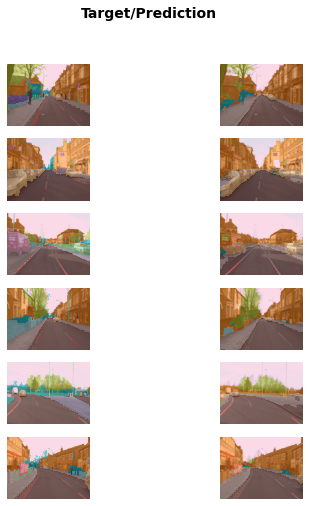

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

In [11]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.452437,0.401049,0.819560,02:51


epoch,train_loss,valid_loss,accuracy,time
0,0.302513,0.251837,0.900800,05:33
1,0.251563,0.203063,0.921400,05:33
2,0.184603,0.190850,0.927600,05:33
3,0.145397,0.193485,0.929640,05:33


In [26]:
#pip install nbdev

In [16]:
doc(TextDataLoaders.from_folder)

If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [17]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german xxunk by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",pos
1,"xxbos xxmaj some have praised xxunk xxmaj lost xxmaj xxunk as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n\n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older adventure movies has been done well before , ( think xxmaj the xxmaj dirty xxmaj dozen ) but xxunk represents one of the worse films in that motif . xxmaj the characters are weak . xxmaj even the background that each member trots out seems stock and awkward at best . xxmaj an xxup md / xxmaj medicine xxmaj man , a tomboy mechanic whose father always wanted sons , if we have not at least seen these before ,",neg
2,"xxbos xxmaj berlin - born in 1942 xxmaj margarethe von xxmaj trotta was an actress and now she is a very important director and writer . xxmaj she has been described , perhaps even unfairly caricatured , as a director whose commitment to bringing a woman 's sensibility to the screen outweighs her artistic strengths . "" rosenstrasse , "" which has garnered mixed and even strange reviews ( the xxmaj new xxmaj york xxmaj times article was one of the most negatively aggressive reviews xxmaj i 've ever read in that paper ) is not a perfect film . xxmaj it is a fine movie and a testament to a rare xxunk of successful opposition to the genocidal xxmaj nazi regime by , of all peoples , generically powerless xxmaj germans demonstrating in a xxmaj berlin street . \n\n xxmaj co - writer von xxmaj trotta uses the actual",pos


In [25]:
learn.predict("It's not a movie that I would recommend to watch") # :))

('pos', tensor(1), tensor([0.0017, 0.9983]))

In [27]:
valid_dl = dls.valid

# To get a single batch of validation data
valid_batch = next(iter(valid_dl))

# This will give you the inputs and targets for the batch
inputs, targets = valid_batch

In [29]:
valid_batch

(TensorText([[  2,   8,  55,  ...,  14, 183,  10],
             [  1,   1,   1,  ...,   1,   1,   1],
             [  1,   1,   1,  ...,   1,   1,   1],
             ...,
             [  1,   1,   1,  ...,   1,   1,   1],
             [  1,   1,   1,  ...,   1,   1,   1],
             [  1,   1,   1,  ...,   1,   1,   1]], device='cuda:0'),
 TensorCategory([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
                 1, 0, 0], device='cuda:0'))

In [46]:
dls.valid.show_batch(max_n=2)

,text,category
0,"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n\n * major xxup spoilers xxup ahead * \n\n ( but you already knew that , did n't you ? ) \n\n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , xxmaj i 'd like to contribute my interpretation of why the plot makes perfect sense . xxmaj as others have pointed out , one single viewing of this movie is not sufficient . xxmaj if you have the xxup dvd of xxup md , you can "" cheat "" by looking at xxmaj david xxmaj lynch 's "" top 10 xxmaj hints to xxmaj unlocking xxup md "" ( but only upon second or third viewing , please . ) ;) \n\n xxmaj first of all , xxmaj mulholland xxmaj drive is",pos
1,"xxbos xxmaj back in the mid / late 80s , an xxup oav anime by title of "" bubblegum xxmaj crisis "" ( which i think is a military slang term for when technical equipment goes haywire ) made its debut on video , taking inspiration from "" blade xxmaj runner "" , "" the xxmaj terminator "" and maybe even "" robocop "" , with a little dash of xxmaj batman / xxmaj bruce xxmaj wayne - xxmaj iron xxmaj man / xxmaj tony xxmaj stark and xxmaj charlie 's xxmaj angel 's girl power thrown in for good measure . 8 episodes long , the overall story was that in 21st century xxmaj tokyo , xxmaj japan , year xxunk - xxunk , living machines called xxmaj boomers were doing manual labor and sometimes cause problems . a special , xxup swat like branch of law enforcers ,",pos


In [44]:
dls.valid_ds.items[:2]

[Path('/root/.fastai/data/imdb/test/pos/8313_8.txt'),
 Path('/root/.fastai/data/imdb/test/pos/8946_9.txt')]

In [49]:
# Assuming dls is your TextDataLoaders object
valid_dl = dls.valid

# Get one batch from the validation DataLoader
batch = next(iter(valid_dl))

# Decode the batch to get the raw texts and labels
decoded_texts = L(valid_dl.decode_batch(batch))

In [50]:
len(decoded_texts)

9

In [53]:
# Now, `decoded_texts` is a list of tuples, each containing the decoded text and its label
for text, label in decoded_texts[:3]:
    print("Label:", label)
    print("Text len:", len(text))
    print("Text(first 100):", text[:100])
    print("------")

Label: pos
Text len: 14286
Text(first 100): xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : 

 * major xxup spoile
------
Label: pos
Text len: 13683
Text(first 100): xxbos xxmaj back in the mid / late 80s , an xxup oav anime by title of " bubblegum xxmaj crisis " ( 
------
Label: pos
Text len: 14130
Text(first 100): xxbos ( some spoilers included :) 

 xxmaj although , many commentators have called this film surrea
------


In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [55]:
doc(ClassificationInterpretation)

In [56]:
interp.confusion_matrix()

array([[11379,  1121],
       [  638, 11862]])

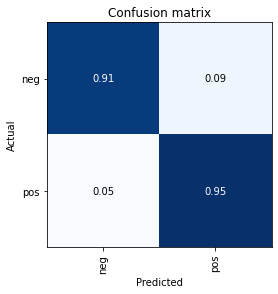

In [57]:
interp.plot_confusion_matrix(normalize=True)

In [61]:
interp.most_confused(5) # this return most confused classes, the function I was looking for is plot_top_losses

[('neg', 'pos', 1121), ('pos', 'neg', 638)]

In [60]:
interp.plot_top_losses(5)

,input,target,predicted,probability,loss
0,"xxbos a wonderful semi - humorous homage to xxmaj expressionistic black and white films of folks like xxup fw xxmaj murnau , xxmaj fritz xxmaj lang , xxmaj carl xxmaj dreyer , xxmaj marcel xxmaj carné and others . xxmaj allen plays a character caught in a xxmaj kafkaesque nightmare , at first thinking he is part of a vigilante group trying to catch a killer and slowly realizing that he might be a suspect . xxmaj the writing is a little forced ( this is , after all , xxmaj woody xxmaj allen trying to be a coy xxmaj kafka ) , but the point is made , and no harm done . xxmaj the cinematography is interesting , about 100 shades of gray , but make sure you watch in a very dark room with a good screen , or details will get swallowed in the fog .",neg,pos,0.9999396800994873,10.07237720489502
1,"xxbos xxmaj yes , the movie is not a piece of art but the first time i watched it i was 10 years old , my parents were out and i stayed home with my two xxunk was xxmaj may xxunk know that because i found a note about the cycle of horror movies that one network xxunk 's one of the most vivid memories i have with the xxunk ended all in one bed and covered up to the head ! xxmaj our very first horror movie ! xxmaj we kept talking about it for years and laughing about the xxunk were horror xxunk horror movies are always the xxunk was it better when we were kids enjoying without analyzing the plot and the cast and the dialogs ? xxmaj most sure it was xxunk for me this is a great movie !",neg,pos,0.9999359846115112,9.846263885498047
2,xxbos xxmaj this is definitely one of the best xxmaj kung fu movies in the history of xxmaj cinema . xxmaj the screenplay is really well done ( which is not often the case for this type of movies ) and you can see that xxmaj chuck ( in one of his first xxunk a great actor . xxmaj the final fight with the xxunk deputy in the bullring is a masterpiece !,neg,pos,0.9997506737709045,9.78321361541748
3,"xxbos xxmaj well , i must say , i initially found this short to be quite average , but having watched it nearly 5 times since ( its constantly shown on xxup ifc ) , xxmaj i 've developed an enjoyment of the simple plot elements and reality of the situations presented . xxmaj sofia xxmaj coppola contributes a solid addition to the category .",neg,pos,0.9999436140060425,9.715006828308105
4,"xxbos i really liked this quirky movie . xxmaj the characters are not the bland beautiful people that show up in so many movies and on xxup tv . xxmaj it has a realistic edge , with a captivating story line . xxmaj the main title sequence alone makes this movie fun to watch .",neg,pos,0.999957799911499,9.656100273132324


# Tabular

In [62]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [67]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371165,0.358880,0.830313,00:06
1,0.349032,0.357705,0.832463,00:06
2,0.368705,0.355349,0.837531,00:07


In [69]:
interp = ClassificationInterpretation.from_learner(learn)

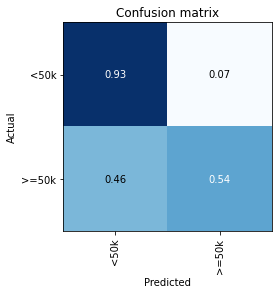

In [70]:
interp.plot_confusion_matrix(normalize=True)

In [72]:
interp.plot_top_losses(5)

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?

   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F
   
1. Name five areas where deep learning is now the best in the world.
1. What was the name of the first device that was based on the principle of the artificial neuron?
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
1. What were the two theoretical misunderstandings that held back the field of neural networks?
1. What is a GPU?
1. Open a notebook and execute a cell containing: `1+1`. What happens?
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.
1. Why is it hard to use a traditional computer program to recognize images in a photo?
1. What did Samuel mean by "weight assignment"?
1. What term do we normally use in deep learning for what Samuel called "weights"?
1. Draw a picture that summarizes Samuel's view of a machine learning model.
1. Why is it hard to understand why a deep learning model makes a particular prediction?
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
1. What do you need in order to train a model?
1. How could a feedback loop impact the rollout of a predictive policing model?
1. Do we always have to use 224×224-pixel images with the cat recognition model?
1. What is the difference between classification and regression?
1. What is a validation set? What is a test set? Why do we need them?
1. What will fastai do if you don't provide a validation set?
1. Can we always use a random sample for a validation set? Why or why not?
1. What is overfitting? Provide an example.
1. What is a metric? How does it differ from "loss"?
1. How can pretrained models help?
1. What is the "head" of a model?
1. What kinds of features do the early layers of a CNN find? How about the later layers?
1. Are image models only useful for photos?
1. What is an "architecture"?
1. What is segmentation?
1. What is `y_range` used for? When do we need it?
1. What are "hyperparameters"?
1. What's the best way to avoid failures when using AI in an organization?

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.